# End-to-End Heart Disease Classification Model using Machine Learning

We're going to take the folloeing approach:
1. Problem definition
2. Data
3. Evaluation
4. Features 
5. Modelling
6. Experimentation

Content
Column Descriptions:
1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
10. -- Values: [normal, stt abnormality, lv hypertrophy]
11. thalach: maximum heart rate achieved
12. exang: exercise-induced angina (True/ False)
13. oldpeak: ST depression induced by exercise relative to rest
14. slope: the slope of the peak exercise ST segment
15. ca: number of major vessels (0-3) colored by fluoroscopy
16. thal: [normal; fixed defect; reversible defect]
17. num: the predicted attribute

Basic library

In [217]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Models and Splitting Data  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

For Evaluation

In [218]:
sklearn_1= ["0. An end-to-end Scikit-Learn workflow",
            "1. Getting the data ready",
            "2. Choose the right estimator/algorithm for our problems",
            "3. Fit the model/algorithm and use it to make predictions on our data",
            "4. Evaluating a model",
            "5. Improve the model", 
            "6. Save and load a trained model",
            "7. Putting it all together"]

In [219]:
heart_disease=pd.read_csv("Data/heart_disease_uci.csv",low_memory=False)

# 1. Getting Data Ready

In [220]:
heart_disease.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [221]:
heart_disease.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [222]:
len(heart_disease)

920

In [223]:
heart_disease.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# As we can see that here in `num` colum there are 5 different values 0,1,2,3,4 
here:

    0-> no heart disease
    1,2,3,4-> stages of heart disease
    so what we can do is `try` first create new column `target` which will only contain 0 and 1 
        0-> no HD
        1-> HD
        and do prediction on that 
    also we can predict that a patient have a heart disease if yes, then what stage `try doing both` if possible compare also 

In [224]:
heart_disease["num"].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [225]:
heart_disease["target"]=heart_disease["num"].replace({2:1,3:1,4:1},regex=True).astype(int)

In [226]:
def add_target(df):
    
    """
    df: Dataframe
    Create a new column called target column
    """
    df["target"]=df["num"].replace({2:1,3:1,4:1},regex=True).astype(int)
add_target(heart_disease)

In [227]:
heart_disease["target"].value_counts()

1    509
0    411
Name: target, dtype: int64

In [228]:
heart_disease.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


# Visualize our data and Correlation

In [229]:
# corr_df=heart_disease.corr()
# corr_df

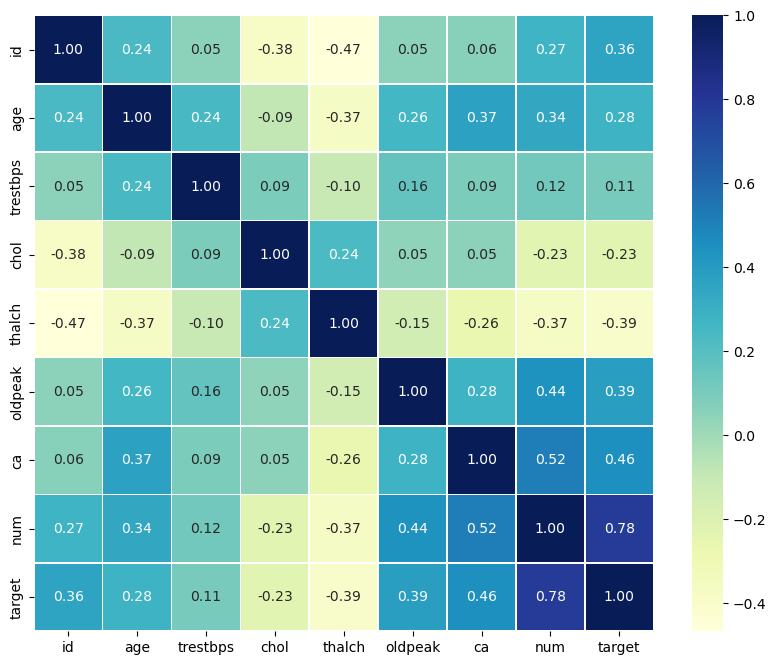

In [230]:
# plt.figure(figsize=(10,8))
# sns.heatmap(corr_df,
#             linewidths=0.5,
#             annot=True,
#             fmt=".2f",
#             cmap="YlGnBu");
def corr_visualize_data(df):
    """
    df: Dataframe
    plot a correlation heatmap with it self
    """
    corr_df=df.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_df,
            linewidths=0.5,
            annot=True,
            fmt=".2f",
            cmap="YlGnBu");
corr_visualize_data(heart_disease)

# Removing all the missing value And Convert values into numbers

In [231]:
heart_disease.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
target        0
dtype: int64

In [232]:
heart_disease.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
target        int32
dtype: object

In [233]:
heart_disease.select_dtypes("float64")

,trestbps,chol,thalch,oldpeak,ca
0,145.0,233.0,150.0,2.3,0.0
1,160.0,286.0,108.0,1.5,3.0
2,120.0,229.0,129.0,2.6,2.0
3,130.0,250.0,187.0,3.5,0.0
4,130.0,204.0,172.0,1.4,0.0
...,...,...,...,...,...
915,127.0,333.0,154.0,0.0,NaN
916,NaN,139.0,NaN,NaN,NaN
917,122.0,223.0,100.0,0.0,NaN
918,NaN,385.0,NaN,NaN,NaN


In [234]:
heart_disease_drop=heart_disease.dropna()

In [235]:
heart_disease_drop.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
target      0
dtype: int64

In [236]:
len(heart_disease_drop)

299

In [237]:
def non_numeric_into_numeric_remove_Missing(df):
    """
    df: Dataframe
    convert object type into numeric by using catogery and remove missing values
    """
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=content.astype("category").cat.as_ordered()
            df[label]=pd.Categorical(content).codes+1
        else:
            if pd.isnull(content).sum():
                df[label]=content.fillna(content.median())

non_numeric_into_numeric_remove_Missing(heart_disease)

In [238]:
# for label,content in heart_disease.items():
#     if pd.api.types.is_object_dtype(content):
#         print(label)

In [239]:
# for label,content in heart_disease.items():
#     if pd.api.types.is_numeric_dtype(content):
#         print(label)

In [240]:
# # converting object into category
# for label,content in heart_disease.items():
#     if pd.api.types.is_object_dtype(content):
#         heart_disease[label]=content.astype("category").cat.as_ordered()

In [241]:
# heart_disease.sex.cat.categories

In [242]:
# heart_disease.sex.cat.codes

In [243]:
# for label,content in heart_disease.items():
#     if pd.api.types.is_numeric_dtype(content):
#         if pd.isnull(content).sum():
#             heart_disease[label]=content.fillna(content.median())

In [244]:
# for label,content in heart_disease.items():
#     if not pd.api.types.is_numeric_dtype(content):
#         heart_disease[label]=pd.Categorical(content).codes+1

In [245]:
heart_disease.isna().value_counts()

id     age    sex    dataset  cp     trestbps  chol   fbs    restecg  thalch  exang  oldpeak  slope  ca     thal   num    target
False  False  False  False    False  False     False  False  False    False   False  False    False  False  False  False  False     920
dtype: int64

# 2. Choose the right estimator/algorithm for our problems

-> splitting the data 

-> three models 

    1. KNeighborsClassifier
    2. RandomForestClassifier
    3. LogisticRegression

-> Using 

    1. RandomSearchCV
    2. GridSearchCV
to optimize the modelestimators

In [250]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [248]:
x=heart_disease.drop(["target","num"],axis=1)
y=heart_disease["target"]

In [283]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [284]:
np.random.seed(42)
RFC_clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
KNC_clf=KNeighborsClassifier(n_jobs=-1,n_neighbors=10)
LR_clf=LogisticRegression(n_jobs=-1)

In [296]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score,RocCurveDisplay,roc_curve

In [286]:
def evaluate(model):
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)
    score={
        # "classification_report_train":classification_report(y_true=y_train,y_pred=train_pred),
        # "classification_report_test":classification_report(y_true=y_test,y_pred=test_pred),
        
        "f1_score_train":f1_score(y_true=y_train,y_pred=train_pred),
        "f1_score_test":f1_score(y_true=y_test,y_pred=test_pred),
        
        "accuracy_score_train":accuracy_score(y_true=y_train,y_pred=train_pred),
        "accuracy_score_test":accuracy_score(y_true=y_test,y_pred=test_pred),

        "recall_score_train":recall_score(y_true=y_train,y_pred=train_pred),
        "recall_score_test":recall_score(y_true=y_test,y_pred=test_pred),

        "precision_score_train":precision_score(y_true=y_train,y_pred=train_pred),
        "precision_score_test":precision_score(y_true=y_test,y_pred=test_pred),

        "roc_auc_score_train":roc_auc_score(y_true=y_train,y_score=train_pred),
        "roc_auc_score_test":roc_auc_score(y_true=y_test,y_score=test_pred)
    }
    return score

In [287]:
RFC_clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [288]:
KNC_clf.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [289]:
LR_clf.fit(x_train,y_train)

LogisticRegression(n_jobs=-1)

In [293]:
evaluate(RFC_clf)

{'f1_score_train': 1.0,
 'f1_score_test': 0.903225806451613,
 'accuracy_score_train': 1.0,
 'accuracy_score_test': 0.8858695652173914,
 'recall_score_train': 1.0,
 'recall_score_test': 0.8990825688073395,
 'precision_score_train': 1.0,
 'precision_score_test': 0.9074074074074074,
 'roc_auc_score_train': 1.0,
 'roc_auc_score_test': 0.882874617737003}

In [292]:
evaluate(KNC_clf)

{'f1_score_train': 0.8281053952321205,
 'f1_score_test': 0.8177339901477833,
 'accuracy_score_train': 0.813858695652174,
 'accuracy_score_test': 0.7989130434782609,
 'recall_score_train': 0.825,
 'recall_score_test': 0.7614678899082569,
 'precision_score_train': 0.8312342569269522,
 'precision_score_test': 0.8829787234042553,
 'roc_auc_score_train': 0.812797619047619,
 'roc_auc_score_test': 0.8074006116207951}

In [291]:
evaluate(LR_clf)

{'f1_score_train': 0.8564231738035265,
 'f1_score_test': 0.8421052631578948,
 'accuracy_score_train': 0.845108695652174,
 'accuracy_score_test': 0.8206521739130435,
 'recall_score_train': 0.85,
 'recall_score_test': 0.8073394495412844,
 'precision_score_train': 0.8629441624365483,
 'precision_score_test': 0.88,
 'roc_auc_score_train': 0.8446428571428573,
 'roc_auc_score_test': 0.8236697247706423}

In [302]:
def ROC_graph(model):
    y_prob=model.predict_proba(x_test)[:, 1]
    fpr,tpr,threshold=roc_curve(y_test,y_prob)
    roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
    plt.plot([0,1],[0,1])
    plt.show();


No handles with labels found to put in legend.


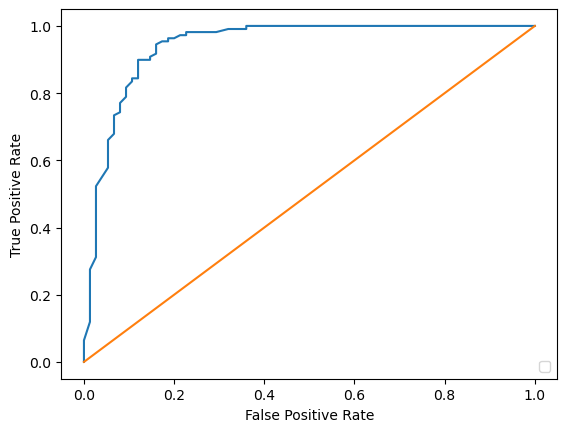

In [303]:
ROC_graph(RFC_clf)

No handles with labels found to put in legend.


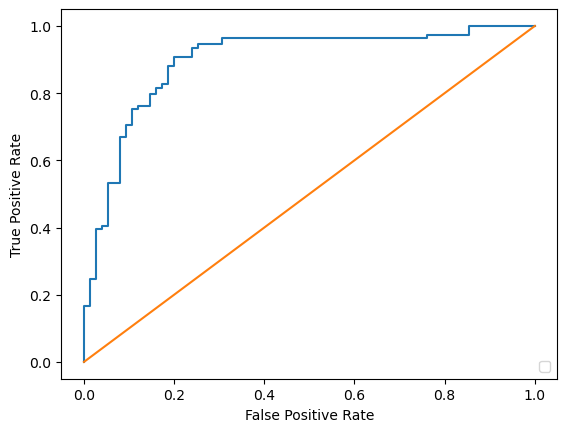

In [304]:
ROC_graph(LR_clf)

No handles with labels found to put in legend.


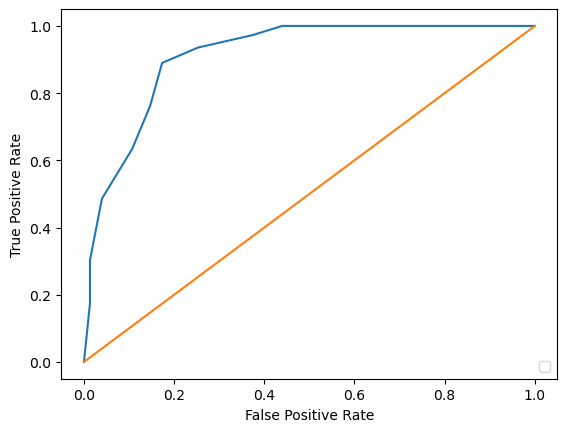

In [305]:
ROC_graph(KNC_clf)

so the RandomForestClassifier performed best. so, I will choose RFC for the RandomizedSearchCV and GridSearchCV 

# Using RandomSearchCV to find best estimators for RandomForestClassifier

In [308]:
grid={
    "n_estimators":[10,90,100,150,200,500,1000,1200],
    "max_depth":[None, 5, 10, 15, 20, 25, 30],
    "min_samples_split": [2, 5, 10, 14, 15, 20, 50],
    "max_features":["sqrt", "log2", None],
    "min_samples_leaf":[1,2,4,6,8]    
}

In [ ]:
# grid={
#     "n_estimators":[10,100,200,500,1000,1200],
#     "max_depth":[None,5,10,20,30],
#     "max_features":['log2',"sqrt"],
#     "min_samples_split":[2,4,6],
#     "min_samples_leaf":[1,2,4]
# }

In [312]:
np.random.seed(42)

RFC_clf=RandomForestClassifier(n_jobs=-1)

RS_RFC_clf=RandomizedSearchCV(
    estimator=RFC_clf,
    param_distributions=grid,
    n_iter=300,
    cv=5,
    n_jobs=-1,
    verbose=2
)
RS_RFC_clf.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14, 15,
                                                              20, 50],
                                        'n_estimators': [10, 90, 100, 150, 200,
                                                         500, 1000, 1200]},
                   verbose=2)

In [313]:
RS_RFC_clf.best_estimator_

RandomForestClassifier(max_depth=25, max_features='log2', min_samples_leaf=8,
                       min_samples_split=5, n_estimators=150, n_jobs=-1)

`best parameter after 150 iterations`
RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=14,
                       n_estimators=150, n_jobs=-1)

`best parameter after 300 iterations` RandomForestClassifier(max_depth=25, max_features='log2', min_samples_leaf=8,
                       min_samples_split=5, n_estimators=150, n_jobs=-1)

In [320]:
RS_y_preds=RS_RFC_clf.predict(x_test)

In [321]:
evaluate(RS_RFC_clf)

{'f1_score_train': 0.9130434782608695,
 'f1_score_test': 0.908256880733945,
 'accuracy_score_train': 0.9021739130434783,
 'accuracy_score_test': 0.8913043478260869,
 'recall_score_train': 0.945,
 'recall_score_test': 0.908256880733945,
 'precision_score_train': 0.883177570093458,
 'precision_score_test': 0.908256880733945,
 'roc_auc_score_train': 0.898095238095238,
 'roc_auc_score_test': 0.8874617737003059}

No handles with labels found to put in legend.


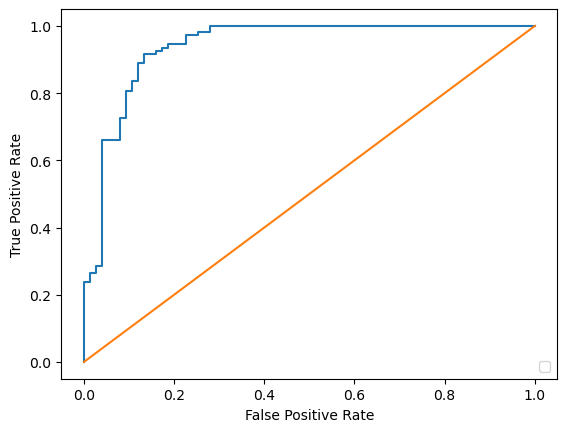

In [333]:
ROC_graph(RS_RFC_clf)

In [327]:
df_preds=pd.DataFrame({"ID":x_test["id"],"y_test":y_test,"RS_y_preds":RS_y_preds})

In [328]:
df_preds

,ID,y_test,RS_y_preds
319,320,0,0
377,378,0,0
538,539,1,1
296,297,1,1
531,532,1,1
...,...,...,...
382,383,0,0
97,98,1,1
906,907,1,1
467,468,0,0


In [332]:
df_preds.to_csv("Data/predicted_HD.csv",index=False)

# Practice

In [2]:
# np.random.seed(42)

# RFC_clf=RandomForestClassifier(n_jobs=-1)

# RS_RFC_clf=RandomizedSearchCV(
#     estimator=RFC_clf,
#     param_distributions=grid,
#     n_iter=300,
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )
# RS_RFC_clf.fit(x_train,y_train)